In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Task 1: Color Patch on `tf2_engineer.jpg`

**Steps**  
1. Load `tf2_engineer.jpg` in BGR format using OpenCV.  
2. Convert to RGB and display the original image.  
3. Compute image center \((y_c, x_c)\).  
4. Print the BGR intensity at the center.  
5. Draw a filled 30×40 rectangle of color `#329ea8` (BGR = `(168, 158, 50)`) centered at \((y_c, x_c)\).  
6. Print the BGR intensity at the patch center.  
7. Convert to RGB and display the image with the color patch.

**Interpretation**  
- You should see the original TF2 engineer image.  
- The printed BGR values confirm you found the correct center pixel.  
- The final image shows a teal rectangle exactly at the center, proving the patch was placed correctly.


In [2]:
# =============================================================
# Task 1: Color Patch on tf2_engineer.jpg
# =============================================================
# Search for the tf2_engineer image
candidates = ['tf2_engineer.jpg']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"TF2 Engineer image not found in paths: {candidates}")

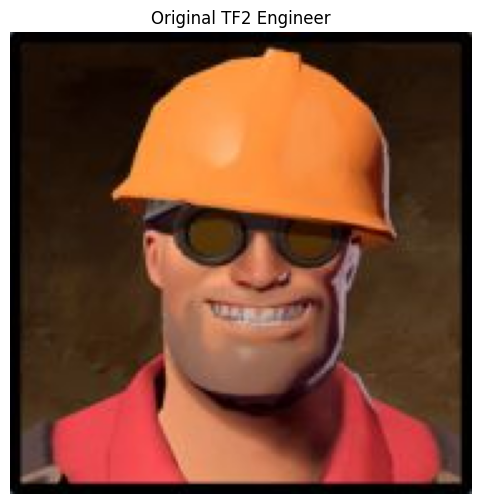

In [3]:
# Load and display the original image in RGB
img_bgr = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title('Original TF2 Engineer')
plt.axis('off')
plt.show()


In [4]:
# Find center coordinates
h, w = img_bgr.shape[:2]
y_c, x_c = h // 2, w // 2
print(f'Center: (y={y_c}, x={x_c})')
print('Original center BGR:', img_bgr[y_c, x_c])

Center: (y=92, x=92)
Original center BGR: [ 67  92 172]


In [5]:
# Draw a color patch (#329ea8) of size 30x40 around the center
patch_color_bgr = (0xa8, 0x9e, 0x32)
patch_h, patch_w = 30, 40
tl = (x_c - patch_w//2, y_c - patch_h//2)
br = (x_c + patch_w//2, y_c + patch_h//2)
img_patch = img_bgr.copy()
cv2.rectangle(img_patch, tl, br, patch_color_bgr, thickness=-1)
print('Patch center BGR:', img_patch[y_c, x_c])

Patch center BGR: [168 158  50]


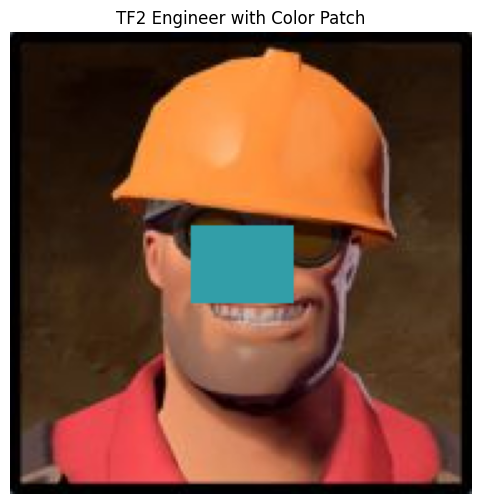

In [6]:
# Display the patched image
img_patch_rgb = cv2.cvtColor(img_patch, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_patch_rgb)
plt.title('TF2 Engineer with Color Patch')
plt.axis('off')
plt.show()

## Task 2: Negative of `einstein.tiff`

**Steps**  
1. Load `einstein.tiff` in grayscale.  
2. Display the original grayscale image.  
3. Compute the negative via `negative = 255 – original`.  
4. Display the negative image.  
5. Randomly select and print intensities of 5 pixels from both the original and negative.

**Interpretation**  
- The original shows Einstein in shades of gray.  
- The negative inverts brightness: dark areas become light and vice versa.  
- Pixel intensity comparisons demonstrate that for each location, `negative = 255 – original`.


In [7]:
# =============================================================
# Task 2: Negative of einstein.tiff
# =============================================================

In [ ]:
# Search for a file among possible extensions
candidates = ['einstein.tiff', 'einstein.tif']
file_path = None
for p in candidates:
    if os.path.exists(p):
        file_path = p
        break
if file_path is None:
    raise FileNotFoundError(f"Einstein image not found for paths: {candidates}")

In [9]:
# Loading grayscale image
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

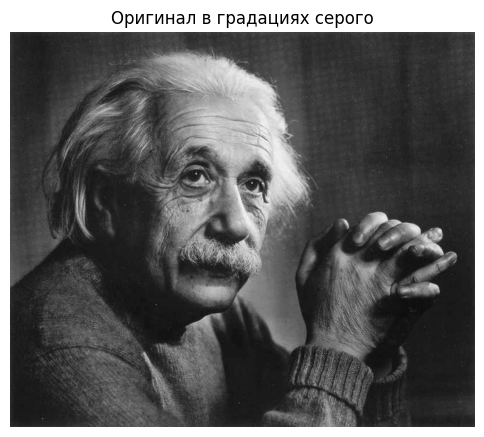

In [ ]:
# Display original image
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Original in grayscale')
plt.show()

In [11]:
# Construction of the negative
img_neg = 255 - img_gray

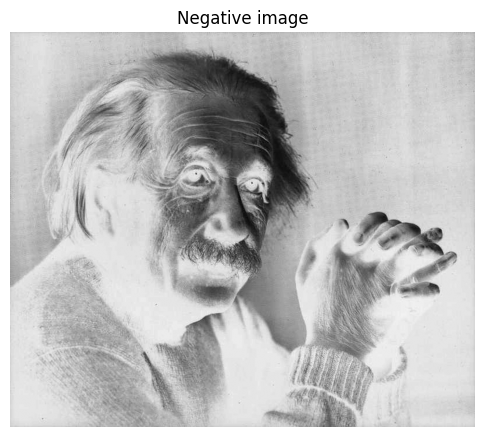

In [12]:
# Displaying a negative image
plt.figure(figsize=(6,6))
plt.imshow(img_neg, cmap='gray')
plt.axis('off')
plt.title('Negative image')
plt.show()

In [13]:
# Select 5 random pixels and output their intensities
h, w = img_gray.shape
np.random.seed(0)  # для воспроизводимости
ys = np.random.randint(0, h, size=5)
xs = np.random.randint(0, w, size=5)


In [ ]:
print("Pixel intensities in the original and in the negative:")
for y, x in zip(ys, xs):
    orig_val = int(img_gray[y, x])
    neg_val = int(img_neg[y, x])
    print(f'Pixel (y={y}, x={x}): original = {orig_val}, negative = {neg_val}')

Интенсивности пикселей в оригинале и в негативе:
Пиксель (y=559, x=723): оригинал = 97, негатив = 158
Пиксель (y=629, x=277): оригинал = 121, негатив = 134
Пиксель (y=192, x=754): оригинал = 99, негатив = 156
Пиксель (y=359, x=599): оригинал = 131, негатив = 124
Пиксель (y=9, x=70): оригинал = 101, негатив = 154


## Task 3: Logarithmic & Inverse-Log Transforms on `pout.tiff`

**Steps**  
1. Load `pout.tiff` in grayscale and display the original.  
2. Compute log-transform:  
   \[
   c = \frac{255}{\ln(1 + \max I)},\quad I_{log} = c \cdot \ln(1 + I)
   \]  
   Display the result.  
3. Apply inverse-log to the original:  
   \[
   I_{inv} = \exp\bigl(I / c\bigr) - 1
   \]  
   Normalize to [0,255] and display.  
4. Apply inverse-log to the log-transformed image, normalize, and display.

**Interpretation**  
- The log-transform expands dark pixel values and compresses bright ones, enhancing shadow detail.  
- Inverse-log on the original roughly recreates the original but may lose contrast due to quantization.  
- Inverse-log on the log image recovers most features but can introduce artifacts in low-intensity regions.


In [15]:
# =============================================================
# Task 3: Log and Inverse Log on pout.tiff
# =============================================================

In [16]:
# Search for the 'pout' file with different extensions
candidates = ['pout.tiff', 'pout.tif']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"Pout image not found in paths: {candidates}")

In [17]:
# 1. Read the original image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

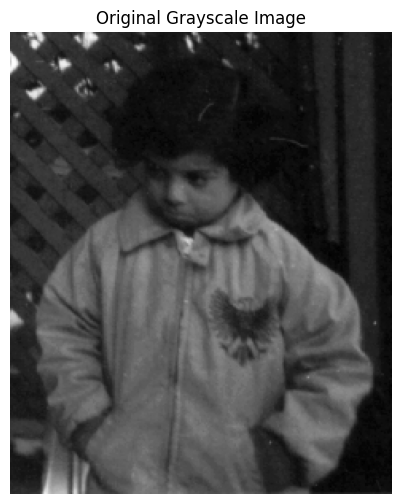

In [18]:
# Display the original grayscale image
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [19]:
# 2. Apply logarithmic transformation
# Compute scaling constant based on the maximum pixel value
c = 255 / np.log1p(np.max(img))
# Apply the log transform and convert back to uint8
log_img = (c * np.log1p(img)).astype(np.uint8)


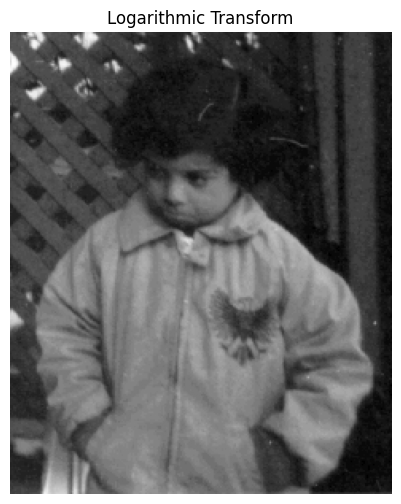

In [20]:
plt.figure(figsize=(6,6))
plt.imshow(log_img, cmap='gray')
plt.title('Logarithmic Transform')
plt.axis('off')
plt.show()

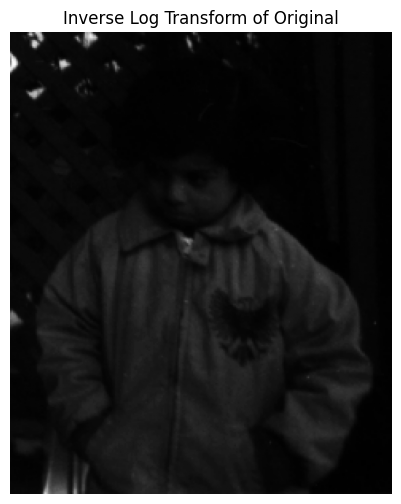

In [21]:
# 3. Inverse log transform applied to the original image
# Apply exponential and rescale to [0, 255]
inv_orig = np.expm1(img / c)
inv_orig = np.clip((inv_orig / np.max(inv_orig)) * 255, 0, 255).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(inv_orig, cmap='gray')
plt.title('Inverse Log Transform of Original')
plt.axis('off')
plt.show()

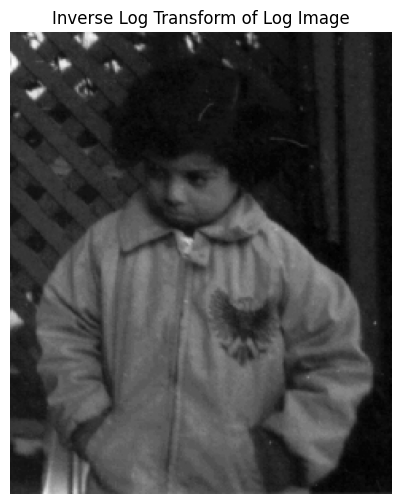

In [22]:
# 4. Inverse log transform applied to the log-transformed image
inv_log = np.expm1(log_img / c)
inv_log = np.clip((inv_log / np.max(inv_log)) * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(inv_log, cmap='gray')
plt.title('Inverse Log Transform of Log Image')
plt.axis('off')
plt.show()

## Task 4: Unsharp Masking on `moon.tiff`

**Steps**  
1. Load `moon.tiff` in grayscale and display.  
2. Precompute a Gaussian high-pass filter mask \(H_{\text{HPF}}\) with cutoff \(D_0\).  
3. For each \(k\in\{0.5,1.0,1.5\}\):  
   - **Spatial domain**:  
     - Blur with Gaussian filter.  
     - Compute mask = original – blurred.  
     - Sharpen = original + \(k\)\(\times\)mask.  
   - **Frequency domain**:  
     - FFT → shift → apply \((1 + k\,H_{\text{HPF}})\) → inverse shift → inverse FFT → real part → clip.  
4. Display spatial and frequency results side by side for each \(k\).

**Interpretation**  
- Spatial unsharp enhances edges by adding back high-frequency detail.  
- Frequency unsharp does the same via spectral filtering.  
- Increasing \(k\) increases sharpening strength but may amplify noise.


In [23]:
# =============================================================
# Task 4: Unsharp Masking on moon.tiff
# =============================================================

In [24]:
# Search for the 'moon' image among possible file extensions
candidates = ['moon.tiff', 'moon.tif', 'moon.png']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"Moon image not found in paths: {candidates}")

In [25]:
# 1. Load the image in grayscale mode
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

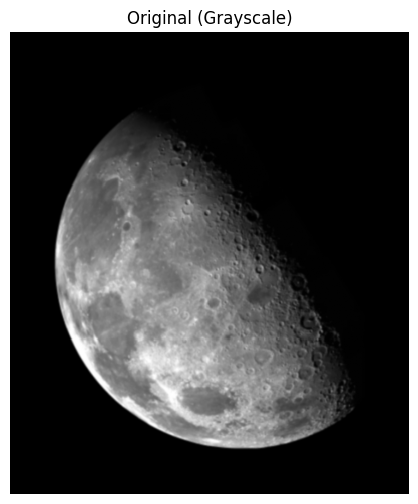

In [26]:
# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')
plt.show()

In [27]:
# Parameters for unsharp masking
k_list = [0.5, 1.0, 1.5]  # gain values to control sharpening strength
D0 = 30                   # cutoff frequency for the high-pass filter

In [28]:
# Precompute frequency-domain high-pass filter mask
M, N = img.shape
u = np.arange(M)
v = np.arange(N)
U, V = np.meshgrid(u - M // 2, v - N // 2, indexing='ij')
D = np.sqrt(U**2 + V**2)
H_hpf = 1 - np.exp(-(D**2) / (2 * (D0**2)))  # Gaussian high-pass filter

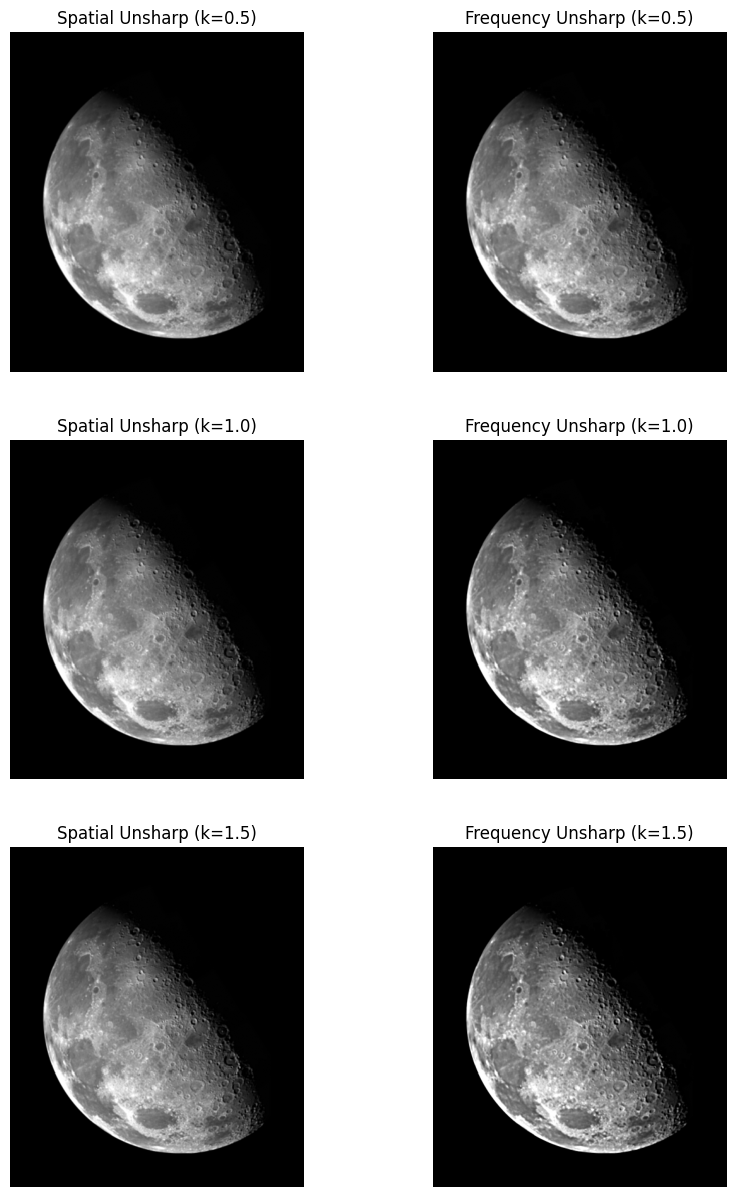

In [29]:
# 4. Allocate subplots
fig, axes = plt.subplots(len(k_list), 2, figsize=(10, 15))

for i, k in enumerate(k_list):
    # --- Spatial-domain unsharp masking ---
    blur = cv2.GaussianBlur(img, (5,5), sigmaX=1.0)
    mask_sp = img.astype(np.float32) - blur.astype(np.float32)
    spat = img.astype(np.float32) + k * mask_sp
    spat = np.clip(spat, 0, 255).astype(np.uint8)

    # --- Frequency-domain unsharp masking ---
    F  = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G_shift = (1 + k * H_hpf) * F_shift
    G = np.fft.ifftshift(G_shift)
    img_back = np.fft.ifft2(G)
    freq = np.clip(np.real(img_back), 0, 255).astype(np.uint8)

    # --- Plot results ---
    axes[i, 0].imshow(spat, cmap='gray')
    axes[i, 0].set_title(f'Spatial Unsharp (k={k})')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(freq, cmap='gray')
    axes[i, 1].set_title(f'Frequency Unsharp (k={k})')
    axes[i, 1].axis('off')

In [30]:
 # --- Frequency-domain unsharp masking ---
    # Compute the Fourier transform of the image
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)
# Apply the high-pass filter in the frequency domain
G_shift = (1 + k * H_hpf) * F_shift
# Inverse shift and inverse FFT to get back to spatial domain
G = np.fft.ifftshift(G_shift)
img_back = np.fft.ifft2(G)
# Take the real part and clip to valid range
freq = np.real(img_back)
freq = np.clip(freq, 0, 255).astype(np.uint8)  
# Display spatial and frequency-domain results side by side
ax_sp = axes[i, 0]
ax_fr = axes[i, 1]
ax_sp.imshow(spat, cmap='gray')
ax_sp.set_title(f'Spatial Unsharp (k={k})')
ax_sp.axis('off')
ax_fr.imshow(freq, cmap='gray')
ax_fr.set_title(f'Frequency Unsharp (k={k})')
ax_fr.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Task 5: Noise Filtering on `pcb.tiff`

**Steps**  
1. Load `pcb.tiff` in grayscale and display.  
2. Plot the intensity histogram to identify noise characteristics.  
3. Apply a 3×3 median filter to remove salt-and-pepper noise.  
4. Apply a light Gaussian blur to smooth residual artifacts.  
5. Display original, median-filtered, and median+Gaussian images side by side.

**Interpretation**  
- The histogram shows spikes at 0 and 255, indicating impulse (“salt-and-pepper”) noise.  
- Median filtering removes isolated bright/dark pixels while preserving edges.  
- Subsequent Gaussian blur smooths small artifacts without significant detail loss.


In [31]:
# =============================================================
# Task 5: Noise Filtering on pcb.tiff
# =============================================================

In [32]:
# Search for the PCB image file among possible extensions
candidates = ['pcb.tiff', 'pcb.tif', 'pcb.png']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"PCB image not found in paths: {candidates}")

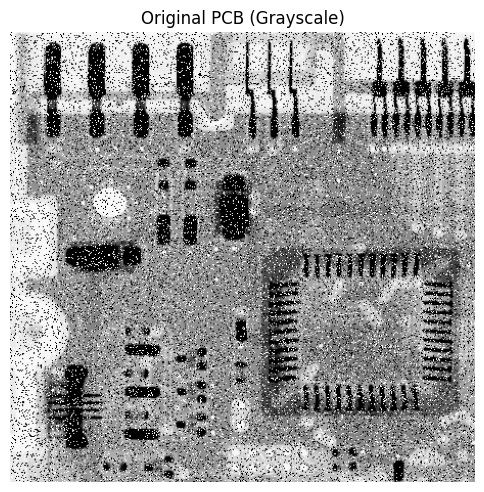

In [33]:
# 1. Load the original image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original PCB (Grayscale)')
plt.axis('off')
plt.show()

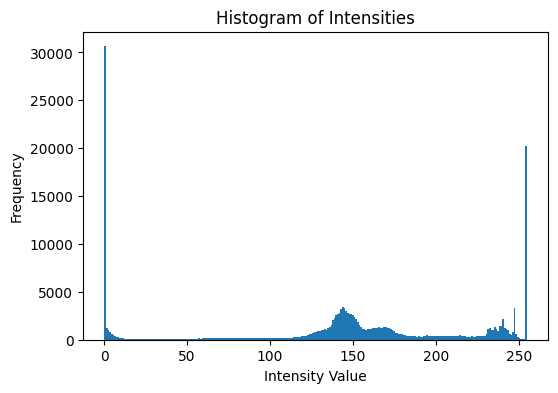

In [34]:
# 2. Plot the histogram of pixel intensities
plt.figure(figsize=(6, 4))
plt.hist(img.ravel(), bins=256)
plt.title('Histogram of Intensities')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

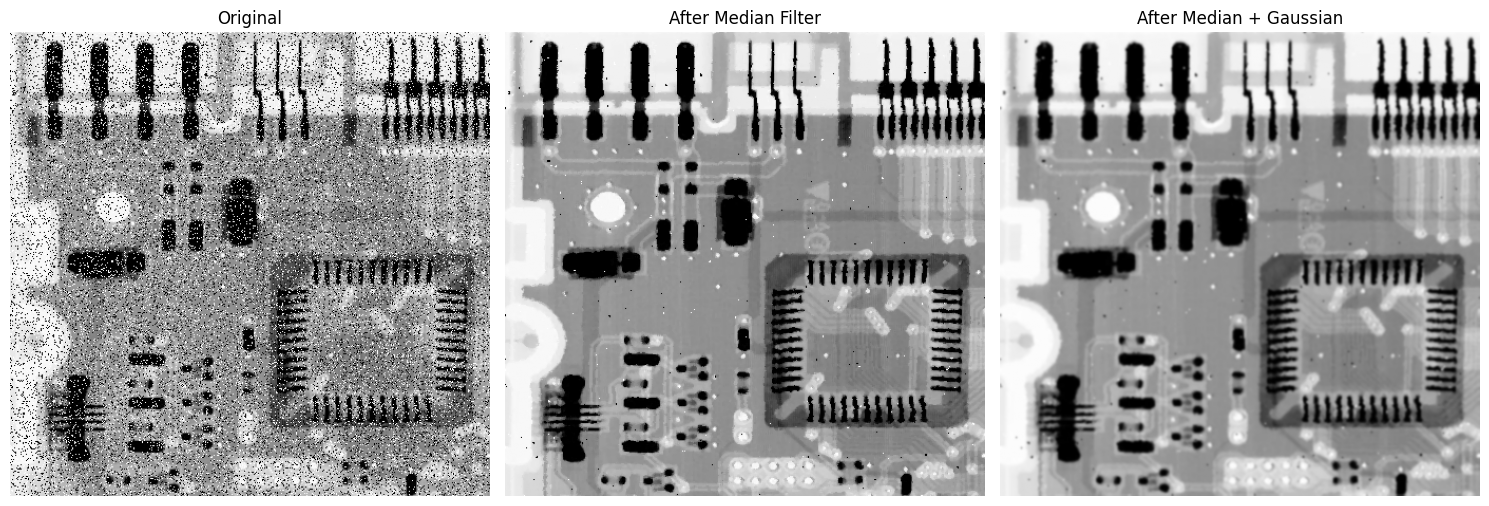

In [35]:
# 3. Noise filtering steps
# 3.1 Apply a median filter to remove salt-and-pepper noise
med = cv2.medianBlur(img, 3)

# 3.2 Apply a light Gaussian blur to smooth remaining artifacts
filtered = cv2.GaussianBlur(med, (5, 5), sigmaX=1.0)

# Display the results side by side: original, after median, after median+Gaussian
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(med, cmap='gray')
ax2.set_title('After Median Filter')
ax2.axis('off')

ax3.imshow(filtered, cmap='gray')
ax3.set_title('After Median + Gaussian')
ax3.axis('off')

plt.tight_layout()
plt.show()

## Task 6: Contrast Enhancement on `pollen.tiff`

**Steps**  
1. Load `pollen.tiff` in grayscale and display.  
2. Compute and print mean & standard deviation; plot original histogram.  
3. **Approach 1: Homomorphic Filtering**  
   - Log-transform the image.  
   - Design a homomorphic filter \(H\) to boost high frequencies.  
   - FFT → shift → multiply by \(H\) → inverse shift → inverse FFT → expm1 → clip.  
   - Display result + histogram.  
4. **Approach 2: Morphological Top-hat + Contrast Stretch**  
   - Estimate background via large-kernel opening.  
   - Compute top-hat = original – background.  
   - Normalize top-hat to [0,255].  
   - Display result + histogram.

**Interpretation**  
- Original has low contrast and uneven illumination.  
- Homomorphic filtering equalizes brightness while enhancing details.  
- Top-hat extract local bright features and contrast-stretches them for clearer texture.


In [36]:
# =============================================================
# Task 6: Contrast Enhancement on pollen.tiff
# =============================================================

In [37]:
# Search for the pollen image file among possible extensions
candidates = ['pollen.tif', 'pollen.tiff']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"Pollen image not found in paths: {candidates}")


In [38]:
# Load the original image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

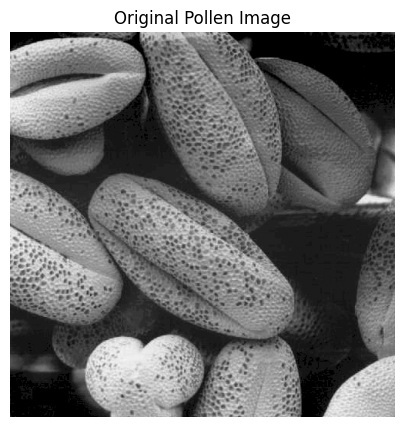

In [39]:
# Display the original grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title('Original Pollen Image')
plt.axis('off')
plt.show()

In [40]:
# Statistical analysis of pixel intensities
# Compute histogram, mean, and standard deviation
hist, bins = np.histogram(img.ravel(), bins=256, range=(0, 255))
mean_int = img.mean()
std_int = img.std()
print(f'Mean intensity: {mean_int:.2f}, Standard deviation: {std_int:.2f}')

Mean intensity: 109.08, Standard deviation: 11.49


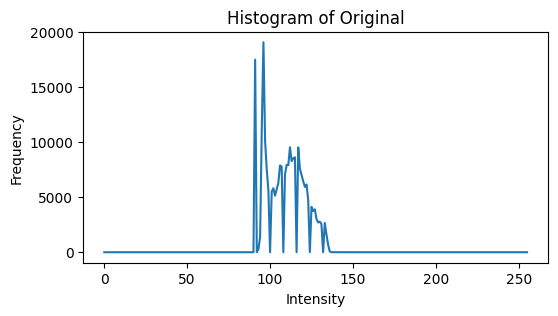

In [41]:
# Plot the histogram of the original image
plt.figure(figsize=(6, 3))
plt.plot(hist)
plt.title('Histogram of Original')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Approach 1: Homomorphic filtering
# Filter parameters
gamma1, gamma2 = 0.5, 2.0   # low and high frequency gain
c_hom, D0 = 1.0, 30.0       # scaling constant and cutoff frequency

In [43]:
# 1. Log-transform the image to separate illumination and reflectance
img_log = np.log1p(img.astype(np.float32))

# 2. Create the homomorphic filter in the frequency domain
M, N = img.shape
y, x = np.indices((M, N))
center = (M / 2, N / 2)
D = np.sqrt((y - center[0])**2 + (x - center[1])**2)
H = (gamma2 - gamma1) * (1 - np.exp(-c_hom * (D**2) / (D0**2))) + gamma1

# 3. Apply filter: FFT → shift → multiply by H → inverse shift → inverse FFT
F = np.fft.fft2(img_log)
F_shift = np.fft.fftshift(F)
G_shift = H * F_shift
G = np.fft.ifftshift(G_shift)
img_hom = np.fft.ifft2(G)
img_hom = np.real(img_hom)

# 4. Exponential to undo log-transform, then clip to [0,255]
img_hom = np.expm1(img_hom)
img_hom = np.clip(img_hom, 0, 255).astype(np.uint8)


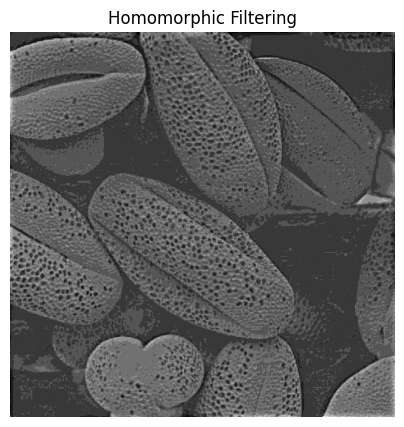

In [44]:
# Display the homomorphic-filtered result
plt.figure(figsize=(5, 5))
plt.imshow(img_hom, cmap='gray')
plt.title('Homomorphic Filtering')
plt.axis('off')
plt.show()

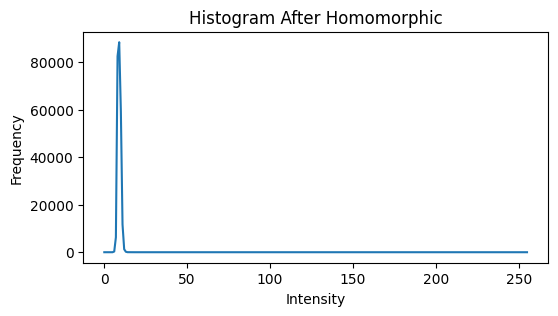

In [45]:
# Plot histogram of the homomorphic result
hist_hom, _ = np.histogram(img_hom.ravel(), bins=256, range=(0, 255))
plt.figure(figsize=(6, 3))
plt.plot(hist_hom)
plt.title('Histogram After Homomorphic')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Approach 2: Morphological Top-hat + Contrast Stretching
# 1. Estimate background via morphological opening with a large structuring element
kernel_size = 51  # size of the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
background = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [47]:
# 2. Compute the Top-hat transform (original minus background)
top_hat = cv2.subtract(img, background)

# 3. Stretch contrast of the Top-hat result to the full 0–255 range
contrast_stretch = cv2.normalize(
    top_hat, None,
    alpha=0, beta=255,
    norm_type=cv2.NORM_MINMAX
)

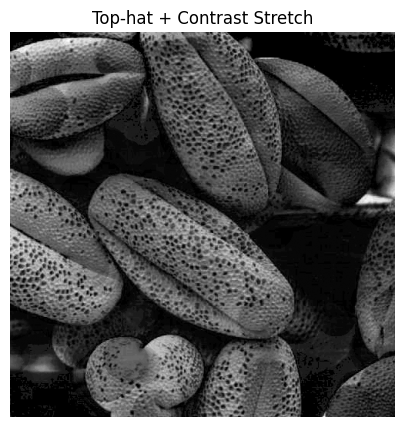

In [48]:
# Display the Top-hat + contrast-stretched result
plt.figure(figsize=(5, 5))
plt.imshow(contrast_stretch, cmap='gray')
plt.title('Top-hat + Contrast Stretch')
plt.axis('off')
plt.show()

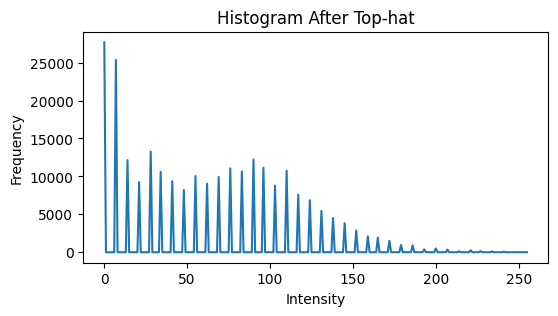

In [49]:
# Plot histogram of the Top-hat result
hist_th, _ = np.histogram(contrast_stretch.ravel(), bins=256, range=(0, 255))
plt.figure(figsize=(6, 3))
plt.plot(hist_th)
plt.title('Histogram After Top-hat')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()